<a href="https://colab.research.google.com/github/cheesedog-paradise/dl01/blob/main/project/dl01_proj02_XOR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR problem
## numpy with back propagation
## MLP
- 1-hidden layer
- 2 hidden-layers
- hyperparameter setting

In [4]:
# numpy - bak propagation with iterations=20000
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # (4,2)
T = np.array([[0], [1], [1], [0]])              # (4,1)

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1    # (2,2)
W2 = 2*np.random.random((hiddens, outputs))-1   # (2,1)
B1 = np.zeros(hiddens)                          # (2,)
B2 = np.zeros(outputs)                          # (1,)
print(W1.shape,W2.shape,B1.shape,B2.shape)

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(50000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T
            # print(layer0.shape,layer1.shape,layer2.shape)
            
            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            # print(layer2_error.shape)
            # print(layer2_delta.shape)
            # print(layer1_error.shape)
            # print(layer1_delta.shape)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0  # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

(2, 2) (2, 1) (2,) (1,)
[[0 0]] [0] [[0.0174087]]
[[0 1]] [1] [[0.98499917]]
[[1 0]] [1] [[0.98502623]]
[[1 1]] [0] [[0.01548921]]


> ### Dose numpy with back propagation solve XOR problem?

In [5]:
# Keras MLP with 1 hidden layer, epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()
 
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 - 0s - loss: 0.2513 - 389ms/epoch - 97ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2513 - 9ms/epoch - 2ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2513 - 9ms/epoch - 2ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.2513 - 14ms/epoch - 3ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2512 - 14ms/epoch - 4ms/step
Epoch 6/2000
4/4 - 0s - loss: 0.2512 - 13ms/epoch - 3ms/step
Epoch 7/2000
4/4 - 0s - loss: 0.2512 - 14ms/epoch - 3ms/step
Epoch 8/2000
4/4 - 0s - loss:

> ### Not good result

In [6]:
# # Keras MLP with 2 hidden layers and epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=16, input_shape=(2,), activation='relu')) #①
model.add(tf.keras.layers.Dense(units=8, activation='relu')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 - 0s - loss: 0.2443 - 412ms/epoch - 103ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2439 - 11ms/epoch - 3ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2433 - 12ms/epoch - 3ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.2428 - 14ms/epoch - 4ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2422 - 13ms/epoch - 3ms/step
Epoch 6/2000

---
---

## [DIY] Hyperparameter control
- Find the optimal training condition with epoches=2000

> ## Try Bard, ChatGPT, Bing AI
- ### Write a MLP code to solve XOR using Keras.

---

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the XOR problem
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]

# Train the model
model.fit(X, Y, epochs=2000, verbose=0)

# Test the model
print(model.predict(X))


1/1 [==============================] - 0s 83ms/step
[[0.09198883]
 [0.9040703 ]
 [0.9038784 ]
 [0.09454018]]


결과가 나쁘지는 않다. 그러나 위의 것이 더 낫다.

챗GPT에게 개선법을 물어 보자.


To improve the performance of the MLP in solving the XOR problem, we can try a few different things:

1. Increase the number of hidden units: In the example code above, we used 8 units in the hidden layer. Increasing the number of hidden units can improve the model's ability to learn complex relationships between the input variables and the output.

2. Use different activation functions: In the example code, we used the ReLU activation function for the hidden layer and the sigmoid activation function for the output layer. Other activation functions, such as the hyperbolic tangent (tanh) function or the leaky ReLU function, may work better for this problem.

3. Use a deeper network: We used a network with only one hidden layer in the example code, but adding more layers can help the model learn more complex features and improve its performance.

4. Change the optimization algorithm or learning rate: The example code uses the Adam optimization algorithm with a default learning rate, but experimenting with different algorithms (such as Stochastic Gradient Descent) and learning rates can help improve the model's performance.

5. Add regularization: Regularization techniques such as L1 or L2 regularization or dropout can help prevent overfitting and improve the generalization ability of the model.

Overall, the key to improving the performance of an MLP (or any machine learning model) is to experiment with different configurations and hyperparameters, and carefully evaluate the results to determine which approach works best for the problem at hand.

In [12]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='tanh', activity_regularizer=tf.keras.regularizers.l1_l2(0.01))) # 히든 유닛 수 증가, relu -> tanh, 마지막으로 l1l2 규제 추가
model.add(Dense(8, activation='relu')) # 히든 레이어 추가
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy']) # 옵티마이저 변경, adam -> SGD

# Define the XOR problem
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]

# Train the model
model.fit(X, Y, epochs=2000, verbose=0)

# Test the model
print(model.predict(X))


1/1 [==============================] - 0s 147ms/step
[[0.08596308]
 [0.61833435]
 [0.95860004]
 [0.09868417]]


저런, 더 나빠졌다. 여기서 일부만 바꿔 보자.

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='tanh', activity_regularizer=tf.keras.regularizers.l1_l2(0.01))) # 히든 유닛 수 증가, relu -> tanh, 마지막으로 l1l2 규제 추가
model.add(Dense(8, activation='relu')) # 히든 레이어 추가
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 옵티마이저 변경, SGD -> adam

# Define the XOR problem
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]

# Train the model
history = model.fit(X, Y, epochs=2000, verbose=0)

# Test the model
print(model.predict(X))


1/1 [==============================] - 0s 158ms/step
[[8.0687058e-04]
 [9.9456060e-01]
 [9.9383336e-01]
 [7.6017282e-03]]


와우, SGD만 없애니 훨씬 낫다.

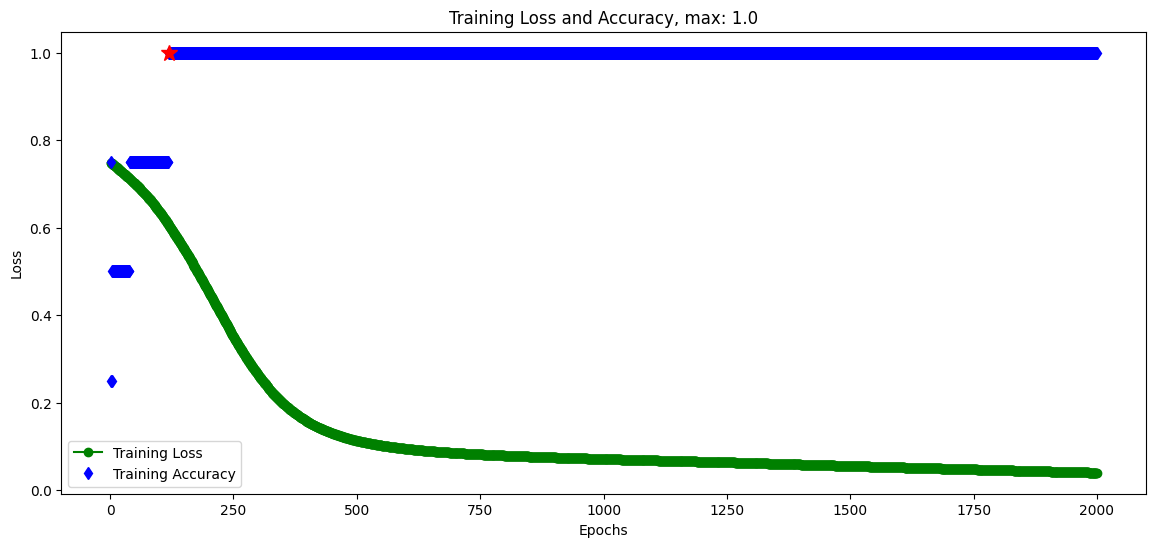

In [23]:
# Training graphs
#
import numpy as np
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
acc = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, acc, 'bd', label='Training Accuracy')
plt.plot(np.argmax(np.array(acc))+1,acc[np.argmax(np.array(acc))], 'r*', ms=12)
plt.title('Training Loss and Accuracy, max: ' + str(np.round(acc[np.argmax(np.array(acc))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()